In [77]:
import re
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

from data_analysis.CLI import ExperimentDir

In [84]:
exp = ExperimentDir.LOCAL
exp_dir = Path(ExperimentDir.host_dir(exp)) / 'runs'
pngs = list(exp_dir.glob('run.*.parsed/*png'))

generic_config_regex = r".+?\.(.+?)-(.+?)(?:-(.+?))_(.+?)-(\d+)\.cfg.+"
local_config_regex = r".+?\.(.+?)-(.+?)-nc(\d+)_(.+?)-(\d+)\.cfg.+"
extract_params_from_config = lambda cfg: re.match(local_config_regex,
                                                  cfg).groups()
extract_cfg_name = lambda cfg: re.match(r"^.+?\.(.+?)\..+$", cfg).group(1)

configs = []
for png in pngs:
    workflow, mode, ncores, node, trial = extract_params_from_config(png.parent.name)
    configs.append({
        'cfg_name': extract_cfg_name(png.parent.name),
        'path': png,
        'workflow': workflow,
        "mode": mode,
        'ncores': int(ncores),
        'node': node,
        'trial': int(trial),
        'image_name': png.name,
    })

df = pd.DataFrame(configs, columns=['cfg_name', 'path', 'workflow', 'mode', 'ncores', 'node', 'trial', 'image_name'])
df

cfg_name                                               path  \
0    daa-local-nc4_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
1    daa-local-nc4_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
2    daa-local-nc4_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
3    daa-local-nc4_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
4    daa-local-nc4_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
..                    ...                                                ...   
319   dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
320   dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
321   dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
322   dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
323   dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   

    workflow   mode  ncores node  trial                  image_name  
0        daa  local       4  gl5     31        run_avg_cpu_freq.png  
1        daa  local       4  gl5     31    run_avg_cpu_util_all.png  
2        daa  local       4  gl5     31  run_avg_cpu_util_every.png  
3        daa  local       4  gl5     31        run_avg_mem_util.png  
4        daa  local       4  gl5     31      run_avg_normalized.png  
..       ...    ...     ...  ...    ...                         ...  
319      dpp  local       8  ss2      9        run_avg_cpu_freq.png  
320      dpp  local       8  ss2      9    run_avg_cpu_util_all.png  
321      dpp  local       8  ss2      9  run_avg_cpu_util_every.png  
322      dpp  local       8  ss2      9        run_avg_mem_util.png  
323      dpp  local       8  ss2      9      run_avg_normalized.png  

[324 rows x 8 columns]

In [96]:
data_gathered = df.groupby(['image_name', 'mode', 'workflow', 'ncores']).size().reset_index(name='count')
data_gathered.to_csv('gathered_data_stat.csv', index=False)
data_gathered

image_name   mode workflow  ncores  count
0         run_avg_cpu_freq.png  local      daa       4     12
1         run_avg_cpu_freq.png  local      daa       8     13
2         run_avg_cpu_freq.png  local      dpp       4     16
3         run_avg_cpu_freq.png  local      dpp       8     18
4         run_avg_cpu_freq.png  local      dpp      16      9
5         run_avg_cpu_freq.png  local      dpp      32     12
6     run_avg_cpu_util_all.png  local      daa       4     10
7     run_avg_cpu_util_all.png  local      daa       8      9
8     run_avg_cpu_util_all.png  local      dpp       4     10
9     run_avg_cpu_util_all.png  local      dpp       8     15
10    run_avg_cpu_util_all.png  local      dpp      16      7
11    run_avg_cpu_util_all.png  local      dpp      32     10
12  run_avg_cpu_util_every.png  local      daa       4     10
13  run_avg_cpu_util_every.png  local      daa       8      9
14  run_avg_cpu_util_every.png  local      dpp       4     10
15  run_avg_cpu_util_every.png  local      dpp       8     15
16  run_avg_cpu_util_every.png  local      dpp      16      7
17  run_avg_cpu_util_every.png  local      dpp      32     10
18        run_avg_mem_util.png  local      daa       4     10
19        run_avg_mem_util.png  local      daa       8      9
20        run_avg_mem_util.png  local      dpp       4     10
21        run_avg_mem_util.png  local      dpp       8     15
22        run_avg_mem_util.png  local      dpp      16      7
23        run_avg_mem_util.png  local      dpp      32     10
24      run_avg_normalized.png  local      daa       4     10
25      run_avg_normalized.png  local      daa       8      9
26      run_avg_normalized.png  local      dpp       4     10
27      run_avg_normalized.png  local      dpp       8     15
28      run_avg_normalized.png  local      dpp      16      7
29      run_avg_normalized.png  local      dpp      32     10

In [97]:
data_gathered_by_node = df.groupby(['image_name', 'mode', 'workflow', 'ncores', 'node']).size().reset_index(
    name='count')
data_gathered_by_node.to_csv('gathered_data_by_node_stat.csv', index=False)
data_gathered_by_node

image_name   mode workflow  ncores node  count
0         run_avg_cpu_freq.png  local      daa       4  gl5      6
1         run_avg_cpu_freq.png  local      daa       4  ss2      6
2         run_avg_cpu_freq.png  local      daa       8  gl5      7
3         run_avg_cpu_freq.png  local      daa       8  ss2      6
4         run_avg_cpu_freq.png  local      dpp       4  gl5      8
5         run_avg_cpu_freq.png  local      dpp       4  ss2      8
6         run_avg_cpu_freq.png  local      dpp       8  gl5      9
7         run_avg_cpu_freq.png  local      dpp       8  ss2      9
8         run_avg_cpu_freq.png  local      dpp      16  gl5      4
9         run_avg_cpu_freq.png  local      dpp      16  ss2      5
10        run_avg_cpu_freq.png  local      dpp      32  gl5      6
11        run_avg_cpu_freq.png  local      dpp      32  ss2      6
12    run_avg_cpu_util_all.png  local      daa       4  gl5      6
13    run_avg_cpu_util_all.png  local      daa       4  ss2      4
14    run_avg_cpu_util_all.png  local      daa       8  gl5      7
15    run_avg_cpu_util_all.png  local      daa       8  ss2      2
16    run_avg_cpu_util_all.png  local      dpp       4  gl5      8
17    run_avg_cpu_util_all.png  local      dpp       4  ss2      2
18    run_avg_cpu_util_all.png  local      dpp       8  gl5      9
19    run_avg_cpu_util_all.png  local      dpp       8  ss2      6
20    run_avg_cpu_util_all.png  local      dpp      16  gl5      4
21    run_avg_cpu_util_all.png  local      dpp      16  ss2      3
22    run_avg_cpu_util_all.png  local      dpp      32  gl5      6
23    run_avg_cpu_util_all.png  local      dpp      32  ss2      4
24  run_avg_cpu_util_every.png  local      daa       4  gl5      6
25  run_avg_cpu_util_every.png  local      daa       4  ss2      4
26  run_avg_cpu_util_every.png  local      daa       8  gl5      7
27  run_avg_cpu_util_every.png  local      daa       8  ss2      2
28  run_avg_cpu_util_every.png  local      dpp       4  gl5      8
29  run_avg_cpu_util_every.png  local      dpp       4  ss2      2
30  run_avg_cpu_util_every.png  local      dpp       8  gl5      9
31  run_avg_cpu_util_every.png  local      dpp       8  ss2      6
32  run_avg_cpu_util_every.png  local      dpp      16  gl5      4
33  run_avg_cpu_util_every.png  local      dpp      16  ss2      3
34  run_avg_cpu_util_every.png  local      dpp      32  gl5      6
35  run_avg_cpu_util_every.png  local      dpp      32  ss2      4
36        run_avg_mem_util.png  local      daa       4  gl5      6
37        run_avg_mem_util.png  local      daa       4  ss2      4
38        run_avg_mem_util.png  local      daa       8  gl5      7
39        run_avg_mem_util.png  local      daa       8  ss2      2
40        run_avg_mem_util.png  local      dpp       4  gl5      8
41        run_avg_mem_util.png  local      dpp       4  ss2      2
42        run_avg_mem_util.png  local      dpp       8  gl5      9
43        run_avg_mem_util.png  local      dpp       8  ss2      6
44        run_avg_mem_util.png  local      dpp      16  gl5      4
45        run_avg_mem_util.png  local      dpp      16  ss2      3
46        run_avg_mem_util.png  local      dpp      32  gl5      6
47        run_avg_mem_util.png  local      dpp      32  ss2      4
48      run_avg_normalized.png  local      daa       4  gl5      6
49      run_avg_normalized.png  local      daa       4  ss2      4
50      run_avg_normalized.png  local      daa       8  gl5      7
51      run_avg_normalized.png  local      daa       8  ss2      2
52      run_avg_normalized.png  local      dpp       4  gl5      8
53      run_avg_normalized.png  local      dpp       4  ss2      2
54      run_avg_normalized.png  local      dpp       8  gl5      9
55      run_avg_normalized.png  local      dpp       8  ss2      6
56      run_avg_normalized.png  local      dpp      16  gl5      4
57      run_avg_normalized.png  local      dpp      16  ss2      3
58      run_avg_normalized.png  local      dpp      32  gl5      6


In [98]:
workflow = 'dpp'
image_name = 'run_avg_mem_util.png'
df_slice = df[(df.workflow == workflow) & (df.image_name == image_name)]
df_slice

cfg_name                                               path  \
104  dpp-local-nc16_gl5-31  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
109  dpp-local-nc16_gl5-32  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
114  dpp-local-nc16_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
119  dpp-local-nc16_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
124   dpp-local-nc16_ss2-1  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
131   dpp-local-nc16_ss2-4  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
136   dpp-local-nc16_ss2-5  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
141  dpp-local-nc32_gl5-31  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
146  dpp-local-nc32_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
151  dpp-local-nc32_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
156  dpp-local-nc32_gl5-35  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
161  dpp-local-nc32_gl5-36  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
166  dpp-local-nc32_gl5-37  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
172   dpp-local-nc32_ss2-3  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
177   dpp-local-nc32_ss2-4  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
182   dpp-local-nc32_ss2-5  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
188   dpp-local-nc32_ss2-7  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
193   dpp-local-nc4_gl5-32  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
198   dpp-local-nc4_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
203   dpp-local-nc4_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
208   dpp-local-nc4_gl5-35  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
213   dpp-local-nc4_gl5-36  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
218   dpp-local-nc4_gl5-37  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
223   dpp-local-nc4_gl5-38  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
228   dpp-local-nc4_gl5-39  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
237    dpp-local-nc4_ss2-6  ..\examples\exp-local\runs\run.dpp-local-nc4_s...   
244    dpp-local-nc4_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc4_s...   
249   dpp-local-nc8_gl5-31  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
254   dpp-local-nc8_gl5-32  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
259   dpp-local-nc8_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
264   dpp-local-nc8_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
269   dpp-local-nc8_gl5-35  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
274   dpp-local-nc8_gl5-36  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
279   dpp-local-nc8_gl5-37  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
284   dpp-local-nc8_gl5-38  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
289   dpp-local-nc8_gl5-39  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
294    dpp-local-nc8_ss2-1  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
299    dpp-local-nc8_ss2-2  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
305    dpp-local-nc8_ss2-4  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
311    dpp-local-nc8_ss2-6  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
316    dpp-local-nc8_ss2-7  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
322    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   

    workflow   mode  ncores node  trial            image_name  
104      dpp  local      16  gl5     31  run_avg_mem_util.png  
109      dpp  local      16  gl5     32  run_avg_mem_util.png  
114      dpp  local      16  gl5     33  run_avg_mem_util.png  
119      dpp  local      16  gl5     34  run_avg_mem_util.png  
124      dpp  local      16  ss2      1  run_avg_mem_util.png  
131      dpp  local      16  ss2      4  run_avg_mem_util.png  
136      dpp  local      16  ss2      5  run_avg_mem_util.png  
141      dpp  local   

In [112]:
df_grouped = df_slice.groupby(['node', 'ncores']).size().reset_index(name='count')
df_max = df_grouped.groupby('ncores')['count'].max().reset_index(name='max_count')
# total_count = df_max['max_count'].sum()
# df_max
display(df_grouped, df_max)

node  ncores  count
0  gl5       4      8
1  gl5       8      9
2  gl5      16      4
3  gl5      32      6
4  ss2       4      2
5  ss2       8      6
6  ss2      16      3
7  ss2      32      4

ncores  max_count
0       4          8
1       8          9
2      16          4
3      32          6

workflow='dpp' image_name='run_avg_mem_util.png'
x_len=2 y_len=27


cfg_name                                               path  \
104  dpp-local-nc16_gl5-31  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
109  dpp-local-nc16_gl5-32  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
114  dpp-local-nc16_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
119  dpp-local-nc16_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
124   dpp-local-nc16_ss2-1  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
131   dpp-local-nc16_ss2-4  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
136   dpp-local-nc16_ss2-5  ..\examples\exp-local\runs\run.dpp-local-nc16_...   
141  dpp-local-nc32_gl5-31  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
146  dpp-local-nc32_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
151  dpp-local-nc32_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
156  dpp-local-nc32_gl5-35  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
161  dpp-local-nc32_gl5-36  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
166  dpp-local-nc32_gl5-37  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
172   dpp-local-nc32_ss2-3  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
177   dpp-local-nc32_ss2-4  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
182   dpp-local-nc32_ss2-5  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
188   dpp-local-nc32_ss2-7  ..\examples\exp-local\runs\run.dpp-local-nc32_...   
193   dpp-local-nc4_gl5-32  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
198   dpp-local-nc4_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
203   dpp-local-nc4_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
208   dpp-local-nc4_gl5-35  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
213   dpp-local-nc4_gl5-36  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
218   dpp-local-nc4_gl5-37  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
223   dpp-local-nc4_gl5-38  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
228   dpp-local-nc4_gl5-39  ..\examples\exp-local\runs\run.dpp-local-nc4_g...   
237    dpp-local-nc4_ss2-6  ..\examples\exp-local\runs\run.dpp-local-nc4_s...   
244    dpp-local-nc4_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc4_s...   
249   dpp-local-nc8_gl5-31  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
254   dpp-local-nc8_gl5-32  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
259   dpp-local-nc8_gl5-33  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
264   dpp-local-nc8_gl5-34  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
269   dpp-local-nc8_gl5-35  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
274   dpp-local-nc8_gl5-36  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
279   dpp-local-nc8_gl5-37  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
284   dpp-local-nc8_gl5-38  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
289   dpp-local-nc8_gl5-39  ..\examples\exp-local\runs\run.dpp-local-nc8_g...   
294    dpp-local-nc8_ss2-1  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
299    dpp-local-nc8_ss2-2  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
305    dpp-local-nc8_ss2-4  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
311    dpp-local-nc8_ss2-6  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
316    dpp-local-nc8_ss2-7  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
322    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   

    workflow   mode params node trial            image_name  
104      dpp  local   nc16  gl5    31  run_avg_mem_util.png  
109      dpp  local   nc16  gl5    32  run_avg_mem_util.png  
114      dpp  local   nc16  gl5    33  run_avg_mem_util.png  
119      dpp  local   nc16  gl5    34  run_avg_mem_util.png  
124      dpp  local   nc16  ss2     1  run_avg_mem_util.png  
131      dpp  local   nc16  ss2     4  run_avg_mem_util.png  
136      dpp  local   nc16  ss2     5  run_avg_mem_util.png  
141      dpp  local   nc32  gl5    31 

n=0 p=0
n=0 p=1
n=0 p=2
n=0 p=3
n=0 p=4
n=0 p=5
n=0 p=6
n=0 p=7
n=0 p=8
n=0 p=9
n=0 p=10
n=0 p=11
n=0 p=12
n=0 p=13
n=0 p=14
n=0 p=15
n=0 p=16
n=0 p=17
n=0 p=18
n=0 p=19
n=0 p=20
n=0 p=21
n=0 p=22
n=0 p=23
n=0 p=24
n=0 p=25
n=0 p=26
n=1 p=0
n=1 p=1
n=1 p=2
n=1 p=3
n=1 p=4
n=1 p=5
n=1 p=6
n=1 p=7
n=1 p=8
n=1 p=9
n=1 p=10
n=1 p=11
n=1 p=12
n=1 p=13
n=1 p=14


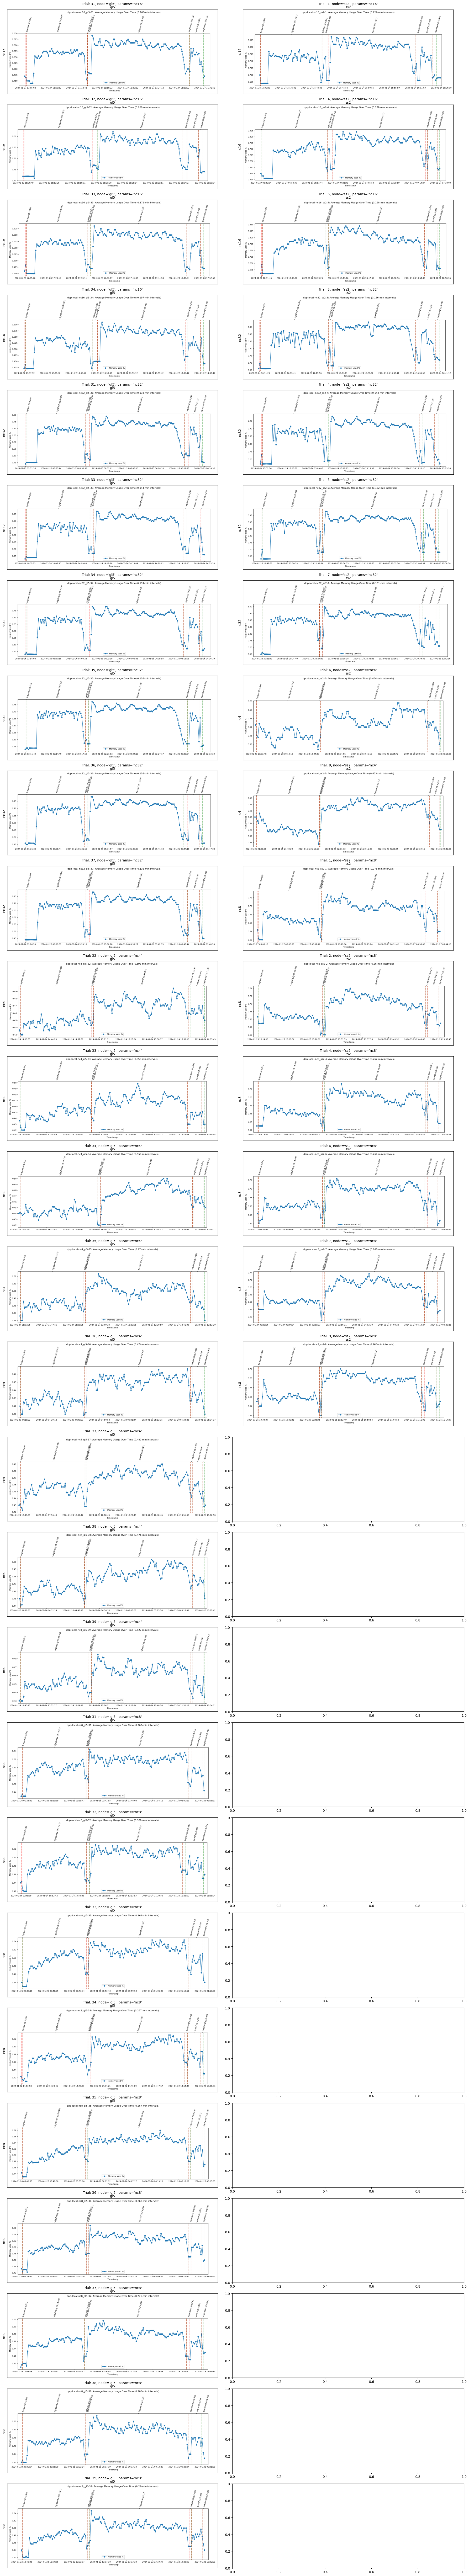

In [66]:

# for unique workflogs
# for workflow in df.workflow.unique():
for workflow in ['dpp']:
    # for image_name in df.image_name.unique():
    for image_name in ['run_avg_mem_util.png']:
        print(f"{workflow=} {image_name=}")
        #                 x axis - nodes
        #                y axis - nc_param
        df_slice = df[(df.workflow == workflow) & (df.image_name == image_name)]
        x_len = len(df_slice.node.unique())
        y_len = df_slice.groupby(['node']).count().ncores.max()
        # y_len = len(df_slice.ncores.unique())
        print(f"{x_len=} {y_len=}")
        fig, ax = plt.subplots(y_len, x_len, figsize=(x_len * 10, y_len * 4))
        display(df_slice)
        for (n, node) in enumerate(df_slice.node.unique()):
            # for (p, ncores) in enumerate(df_slice.ncores.unique()):
            for (nc, ncores) in enumerate(df_slice[df_slice.node == node].ncores):
                print(f"{n=} {nc=}")
                cfg = df_slice[(df_slice.node == node)].iloc[nc]
                ax[nc, n].imshow(plt.imread(cfg.path))
                ax[nc, n].set_title(f"Trial: {cfg.trial}, {node=}, {ncores=}", fontsize=10, pad=2)
                # ax[p, n].axis('off')
                ax[nc, n].set_xticks([])
                ax[nc, n].set_yticks([])
                ax[nc, n].xaxis.set_label_position('top')
                ax[nc, n].set_xlabel(node)
                ax[nc, n].set_ylabel(ncores)

                # for axx, ncores in zip(ax[0], unique_ncores):
                #     axx.set_xlabel(ncores, fontsize=12, labelpad=10)
                # for axx, node in zip(ax[:, 0], unique_nodes):
                #     axx.set_ylabel(node, fontsize=12, labelpad=10)

        # add labels to the plot
        # plt.xlabel('node')
        # plt.ylabel('ncores')
        # plt.xticks(range(x_len), x_ticks)
        # plt.yticks(range(y_len), y_ticks)
        # Add labels and ticks to the plot

        plt.tight_layout()
        plt.savefig(f"{workflow}_{image_name}")
        plt.show()

